# Deep Learning: Coding Assignment 1

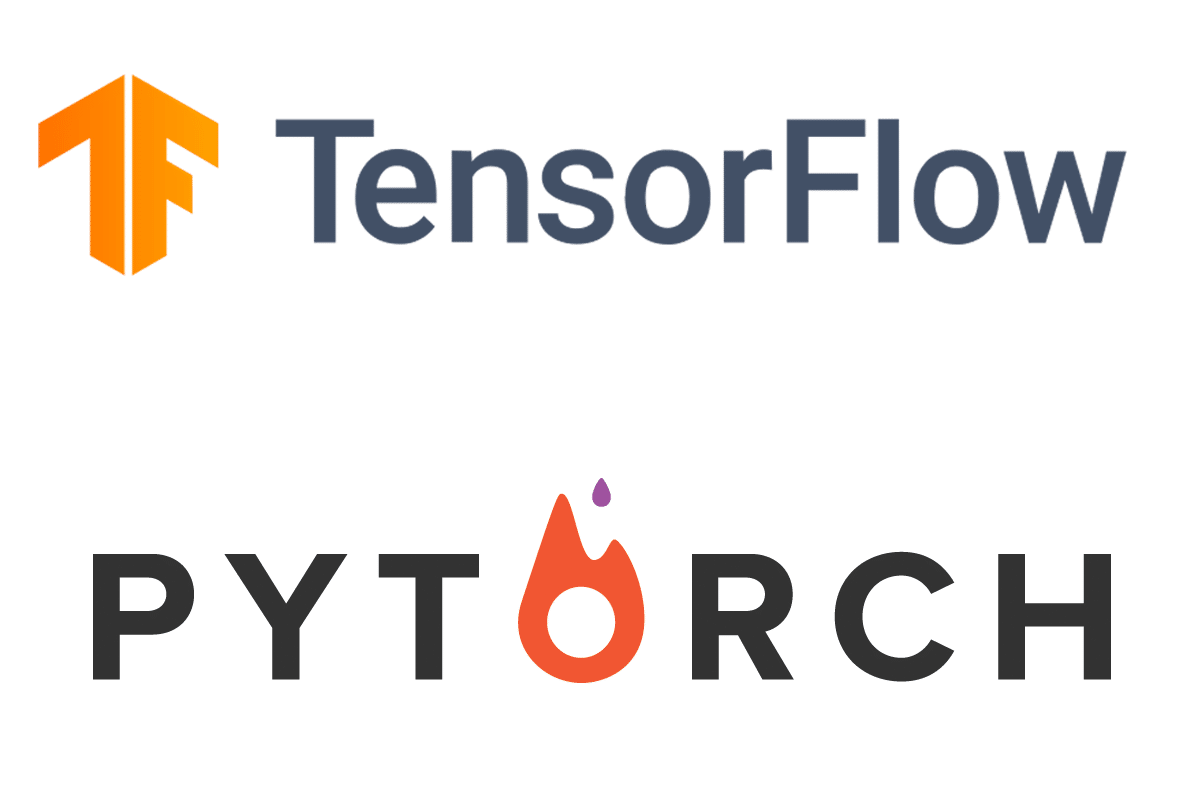

# Hello everyone :
Welcome to the first assignment for your Deep Learning course. In this homework, we will cover and reinforce some of the concepts you taught in your class. I hope you can find a better appreciation and deepen your understanding of the subject matter.
In this assignment, we will focus on the following topics:
1. Vectorization
2. Gradient Descent
3. Linear Regression
4. Logistic Regression
5. MNIST Classification using Multilayer Perceptron

# Prerequisites:
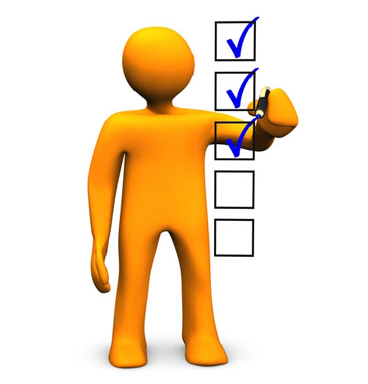

1. Please do not replica your assignments. ❌
2. On the one hand, Your codes ought to include explanations. On the other hand, You do not demand to consider any separate file for your report.   ✅
* **There is no obligation that your answer includes many details. Your response can be concise but should be accurate and to the point.**
   
* **Either Persian or English is acceptable for your report.** Nonetheless, if you choose to write Persian in Markdown, please make sure it's legible before submitting your notebook.

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn import datasets
import time
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

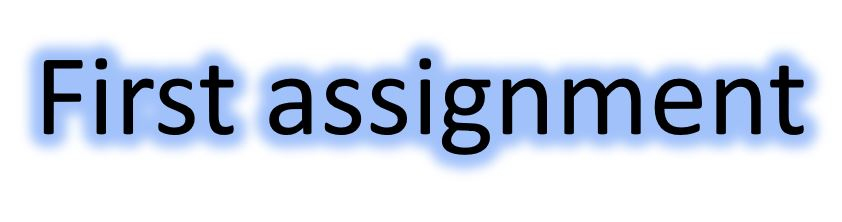

In this section, we get familiar with vectorization. As you learned in your class, When training our models, we typically want to process whole mini-batches of examples simultaneously. In fact, doing this requires that we vectorize computations and leverage fast linear algebra libraries rather than writing costly for-loops.

❓ **Practice:**  
**We want you to implement the matrix multiplication operation twice vectorization technique and non-vectorization(loops). Afterward, you should compare two strategies. Indeed, your answer should comprise an analogy of the execution time of two methods.** \
✍ Required matrices ✍ \
A = np.random.randn(200,300)\
B = np.random.randn(300,400)

In [2]:
A = np.random.randn(200, 300)
B = np.random.randn(300, 400)

In [3]:
# Vectorized version
vectorized_tic = time.time()
vectorized_C = np.dot(A, B)
vectorized_tac = time.time()

In [4]:
# Non-vectorized version
non_vectorized_tic = time.time()
m = A.shape[0]
l = A.shape[1]
n = B.shape[1]
non_vectorized_C = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        c = 0
        for k in range(l):
            c += A[i][k] * B[k][j]
        non_vectorized_C[i][j] = c
non_vectorized_tac = time.time()

In [5]:
# Check both results are equal (due to datatypes usage they have small differences)
print(np.allclose(vectorized_C, non_vectorized_C))

True


In [6]:
# Compare the runtime of the two approaches
print("Time elapsed in vectorized approach: " + str(vectorized_tac - vectorized_tic) + " seconds")
print("Time elapsed in non-vectorized approach: " + str(non_vectorized_tac - non_vectorized_tic) + " seconds")

Time elapsed in vectorized approach: 0.002002239227294922 seconds
Time elapsed in non-vectorized approach: 20.855334520339966 seconds


We see that the vectorized approach is almost **10000** times faster!

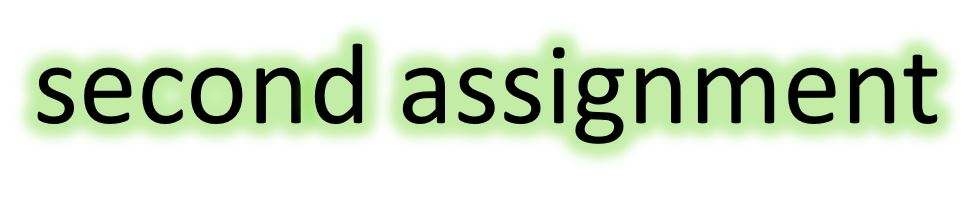

Below, I am enabling CUDA to use my GPU for tensor operations.

In [7]:
#choosing device running model
my_gpu = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', my_gpu)
print('GPU Model:', torch.cuda.get_device_name(my_gpu))

Device: cuda
GPU Model: GeForce GTX 1650


$\color{green}{\text{This section is divided into three parts}}$: \
A) First of all, you will learn the basics of differentiation:\
$\color{red}{\text{Indication}}$: \
For instance:
consider the following function: \
$y=x^{2}+2x+1$ \
The derivative is given by:\
$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x+2$

$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)+2=6$\
❓ **Practice 1:**\
Determine the derivative of $ y = 2x^3+x $ at $x=1$\
B) Second, We can also calculate <b>Partial Derivatives</b>.\
❓ **Practice 2:**\
Try to determine partial derivative  $u$ and $v$ of the following function where $u=1$ and $v=2$: $f(u,v)=vu+u^{2}$ \
$\color{red}{\text{Clue}}$: 

1. Take the derivative with respect to $u$:
2. Now, take the derivative with respect to $v$:

C) Third, we can calculate the minimum of any given differentiable function through:

Gradient descent is a method to find the minimum of a function, it can be applied to functions with multiple dimensions.
$$x_{i+1} = x_i - \alpha \frac{\partial F(x = x_i)}{\partial x},\space for\space i = 1, \cdots, n.$$
❓ **Practice 3:**

*   Find the minimum of $f(x)=x^2$ 

*   Find the minimum of $f(x)= x.cos(px)$
$\color{blue}{\text{(First you need to clarify what feature this function has) }}$

$\color{red}{\text{Hint: You have to do these stages}}$:


1.   Definition function
2.   Define parameters for training
3.   Plot original function
4.   Training
5.   Plot Approximate values

$\color{red}{\text{Given values}}$:

For $F(x)=x^2$, $x=1000$, and number of iteration = 500\
For $F(x)= x.cos(px)$, $x=10$, $p=0.15$, and number of iteration = 10

#### Practice 1

In [8]:
# Define a tensor of size 1 storing value 1
x = torch.ones(1, requires_grad = True, device = my_gpu)
print(x)

tensor([1.], device='cuda:0', requires_grad=True)


In [9]:
# Define y = 2x ^ 3 + x function
y = 2 * x ** 3 + x
print(y)

tensor([3.], device='cuda:0', grad_fn=<AddBackward0>)


In [10]:
# Calculate gradient of y with respect to x
y.backward()
print(x.grad)

tensor([7.], device='cuda:0')


#### Practice 2

In [11]:
# Define u and v as tensors
v = torch.tensor(2.0, requires_grad = True, device = my_gpu)
u = torch.tensor(1.0, requires_grad = True, device = my_gpu)

# Define the function y = vu + u ^ 2
y = v * u + u ** 2

In [12]:
# Use retain_graph=True: If you need to perform
# multiple backward passes through the same graph
# or access saved tensors after calling backward(),
# you can specify retain_graph=True when calling
# backward(). This retains the graph and prevents
# its intermediate values from being freed.

# y.backward(retain_graph = True)


y.backward()

In [13]:
# Take the partial derivative with respect to u
print(u.grad)

tensor(4., device='cuda:0')


In [14]:
# Take the partial derivative with respect to v
print(v.grad)

tensor(1., device='cuda:0')


In [15]:
u

tensor(1., device='cuda:0', requires_grad=True)

#### Practice 3

- Define parameters for training

In [16]:
# initialize x (parameter of the model) and the function y = x ^ 2
x = torch.tensor([1000.0], requires_grad = True, device = my_gpu)

- Definition function

In [17]:
y = x ** 2

- Plot original function

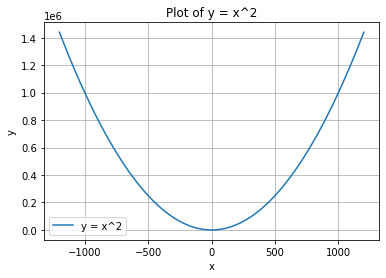

In [18]:
# Generate x values
x_plot = np.linspace(-1200, 1200, 100)  # Create 100 evenly spaced points between -1200 and 1200

# Calculate corresponding y values
y_plot = x_plot**2

# Create the plot
plt.plot(x_plot, y_plot, label='y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.legend()  # Display the legend (label)
plt.grid(True)

# Show the plot
plt.show()

- Training

In [19]:
# train
num_epochs = 500
alpha = 0.1
# arrays to store values of x and y during training
x_plot = np.zeros(num_epochs)
y_plot = np.zeros(num_epochs)
for i in range(num_epochs):
    x_plot[i] = x.item()
    y_plot[i] = y.item()
    y.backward()
    x.grad
    updated_x = x - alpha * x.grad
    # Create a new tensor with gradients enabled
    x = updated_x.clone().detach().requires_grad_(True)
    y = x ** 2
    print("epoch", str(i) + ":", "x =", x.item(), "y =", y.item())

epoch 0: x = 800.0 y = 640000.0
epoch 1: x = 640.0 y = 409600.0
epoch 2: x = 512.0 y = 262144.0
epoch 3: x = 409.6000061035156 y = 167772.171875
epoch 4: x = 327.67999267578125 y = 107374.1796875
epoch 5: x = 262.14398193359375 y = 68719.46875
epoch 6: x = 209.71517944335938 y = 43980.45703125
epoch 7: x = 167.7721405029297 y = 28147.490234375
epoch 8: x = 134.21771240234375 y = 18014.39453125
epoch 9: x = 107.3741683959961 y = 11529.2119140625
epoch 10: x = 85.89933776855469 y = 7378.6962890625
epoch 11: x = 68.71946716308594 y = 4722.365234375
epoch 12: x = 54.9755744934082 y = 3022.313720703125
epoch 13: x = 43.98046112060547 y = 1934.281005859375
epoch 14: x = 35.18436813354492 y = 1237.9398193359375
epoch 15: x = 28.14749526977539 y = 792.281494140625
epoch 16: x = 22.517995834350586 y = 507.0601501464844
epoch 17: x = 18.01439666748047 y = 324.51849365234375
epoch 18: x = 14.411517143249512 y = 207.69183349609375
epoch 19: x = 11.529213905334473 y = 132.9227752685547
epoch 20: x 

- Plot Approximate values

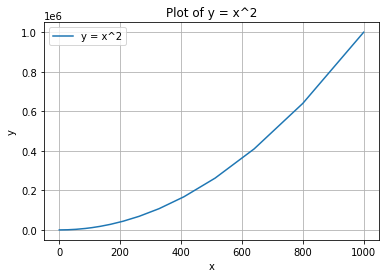

In [20]:
# Create the plot
plt.plot(x_plot, y_plot, label='y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.legend()  # Display the legend (label)
plt.grid(True)

# Show the plot
plt.show()

- Define parameters for training

In [21]:
# initialize x (parameter of the model) and the function y = x.cos(px)
x = torch.tensor([10.0], requires_grad = True, device = my_gpu)

- Definition function

In [22]:
p = 0.15
y = x * torch.cos(p * x)

- Plot original function

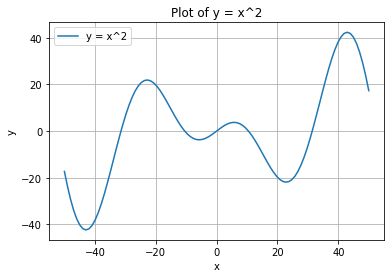

In [23]:
# Generate x values
x_plot = np.linspace(-50, 50, 100)  # Create 100 evenly spaced points between -50 and 50

# Calculate corresponding y values
y_plot = x_plot * np.cos(p * x_plot)

# Create the plot
plt.plot(x_plot, y_plot, label='y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.legend()  # Display the legend (label)
plt.grid(True)

# Show the plot
plt.show()

- Training

In [24]:
# train
num_epochs = 10
alpha = 0.8
# arrays to store values of x and y during training
x_plot = np.zeros(num_epochs)
y_plot = np.zeros(num_epochs)
for i in range(num_epochs):
    x_plot[i] = x.item()
    y_plot[i] = y.item()
    y.backward()
    x.grad
    #print(x.grad)
    updated_x = x - alpha * x.grad
    # Create a new tensor with gradients enabled
    x = updated_x.clone().detach().requires_grad_(True)
    y = x * torch.cos(p * x)
    print("epoch", str(i) + ":", "x =", x.item(), "y =", y.item())

epoch 0: x = 11.140403747558594 y = -1.1151148080825806
epoch 1: x = 12.550615310668945 y = -3.8501334190368652
epoch 2: x = 14.229487419128418 y = -7.602183818817139
epoch 3: x = 16.100313186645508 y = -12.034560203552246
epoch 4: x = 17.981727600097656 y = -16.235654830932617
epoch 5: x = 19.631591796875 y = -19.252443313598633
epoch 6: x = 20.87689781188965 y = -20.87584114074707
epoch 7: x = 21.702054977416992 y = -21.5618896484375
epoch 8: x = 22.20138168334961 y = -21.80763816833496
epoch 9: x = 22.487667083740234 y = -21.887475967407227


- Plot Approximate values

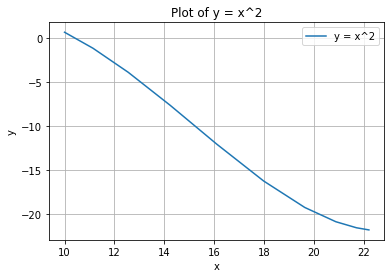

In [25]:
# Create the plot
plt.plot(x_plot, y_plot, label='y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.legend()  # Display the legend (label)
plt.grid(True)

# Show the plot
plt.show()

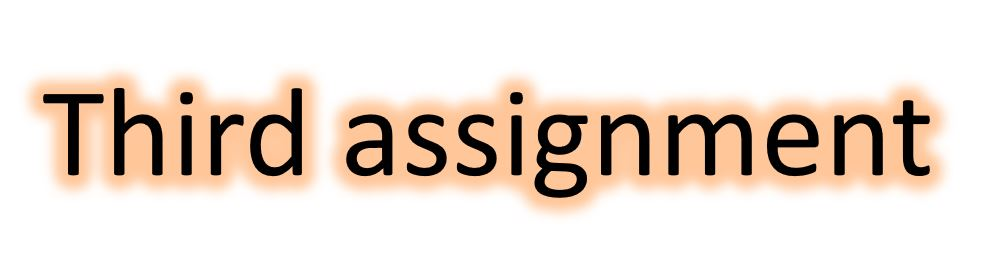

As is well known, the objective of a linear regression task is to minimize the discrepancy between the regression coefficient's anticipated and observed values (actual values). If regression is defined as follows, then this implies that:
$$ y = w^\mathbf{T} x + b,$$
Our goal is to minimize the following loss function by setting $w$ and $b$ in this manner:
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2,$$
Where 

MSE	=	mean squared error 

n =	number of data points 

$Y_{i}$	=	observed values 

$\hat{Y}_{i}$	=	predicted values

❓ Practice: 

The third goal in this part is to use the MSE loss function and the gradient descent method to train a linear regressor.
* After every iteration, plot the loss values.
* Plot original data and fitted line

# **Dataset**

In [26]:
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise= 20, random_state=1)

In [27]:
# Initialize w with a random value
w = np.random.rand(1)

# Initialize b with a random value
b = np.random.rand(1)

# Initialize hyperparameters
alpha = 0.01
num_epochs = 200

# Store the number of data points
n = X_numpy.shape[0]

# Lists to store loss values and fitted values
loss_history = np.zeros(num_epochs)

In [28]:
# Gradient descent
for i in range(num_epochs):
    # Calculate predicted values
    Y_pred = np.dot(X_numpy, w) + b
    
    # Calculate the MSE loss
    mse = np.mean((Y_numpy - Y_pred) ** 2)
    loss_history[i] = mse
    
    # Calculate gradients
    dw = (-2 / n) * np.dot((Y_numpy - Y_pred), X_numpy)
    db = (-2 / n) * np.sum(Y_numpy - Y_pred)
    
    # Update weights and bias
    w -= alpha * dw
    b -= alpha * db

- Plot of loss values

Text(0, 0.5, 'MSE Loss')

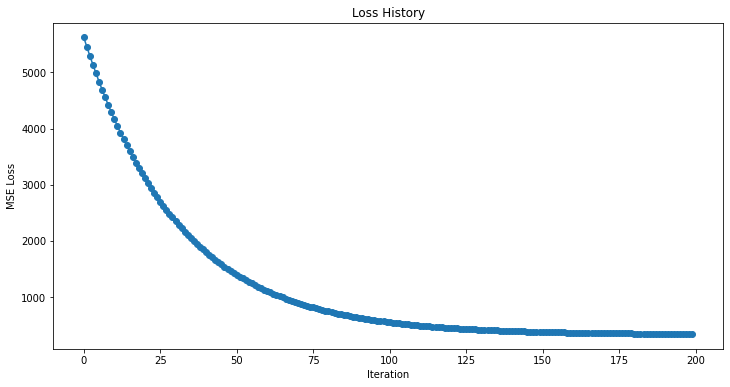

In [29]:
# Plot the loss values
plt.figure(figsize=(12, 6))
plt.plot(range(num_epochs), loss_history, marker='o')
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")

- Plot data and line fitted to it

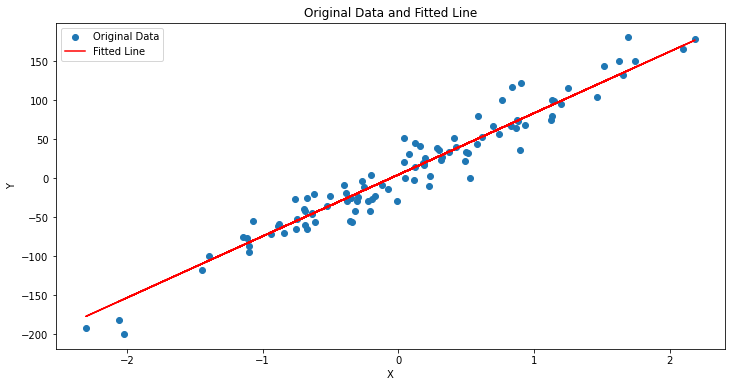

In [30]:
# Plot the original data and fitted line
plt.figure(figsize=(12, 6))
plt.scatter(X_numpy, Y_numpy, label='Original Data')
plt.plot(X_numpy, w * X_numpy + b, color='red', label='Fitted Line')
plt.title("Original Data and Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

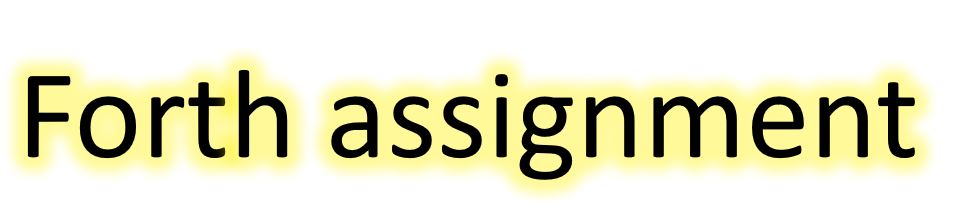

 ❓ Practice: 
 
In this section, You must demonstrate that a single-layered neural network (perceptron) cannot accurately classify the following dataset. Describe the reasons behind this.

#**Dataset**

In [31]:
X_numpy, Y_numpy = make_blobs(
    n_features=2, n_samples=100, centers=4, random_state=42,
)
Y_numpy[Y_numpy==2] = 0
Y_numpy[Y_numpy==3] = 1

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y_numpy, test_size=0.2, random_state=42)

# X_train: Training features
# X_test: Testing features
# Y_train: Training labels
# Y_test: Testing labels

In [33]:
# Convert numpy array to torch tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

In [34]:
X_train.shape

torch.Size([80, 2])

In [35]:
class MyPerceptron(torch.nn.Module):
    def __init__(self, input_dim):
        super(MyPerceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

input_dim = X_train.shape[1]
model = MyPerceptron(input_dim)

In [36]:
# Binary Cross Entropy Loss
criterion = torch.nn.BCELoss()
# Optimizer is responsible for updating the model's parameters during each training iteration
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [37]:
# Train the model for 1000 iterations
num_epochs = 1000
for epoch in range(num_epochs):
    # Reset the gradients before each forward and backward pass during training
    optimizer.zero_grad()
    # Run the model on X_train
    outputs = model(X_train)
    # Calculate loss
    loss = criterion(outputs, Y_train.view(-1, 1))
    # Do a backward pass
    loss.backward()
    # Update model's parameters
    optimizer.step()
    # Print loss after every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

Epoch [100/1000], Loss: 0.6282195448875427
Epoch [200/1000], Loss: 0.6261427402496338
Epoch [300/1000], Loss: 0.6244744062423706
Epoch [400/1000], Loss: 0.6231372356414795
Epoch [500/1000], Loss: 0.6220678091049194
Epoch [600/1000], Loss: 0.6212137341499329
Epoch [700/1000], Loss: 0.620532751083374
Epoch [800/1000], Loss: 0.6199902296066284
Epoch [900/1000], Loss: 0.6195583939552307
Epoch [1000/1000], Loss: 0.6192150115966797


In [38]:
# Switch the neural network model from training mode to evaluation mode
model.eval()
# Disables gradient computation (we just need forward pass)
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = torch.sigmoid(y_pred)
    test_loss = criterion(y_pred, Y_test.view(-1, 1))

print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.6385427117347717


- Since there is not much difference between the value of loss regarding train and test phase, we conclude that our model is a simple model which is high-biased and under-fitted. So we need to use more complex models by increasing number of layers.

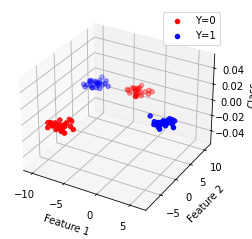

In [39]:

# Assuming X_numpy is your feature data and Y_numpy is your binary classification labels (0 or 1)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Separate the data points by class (Y=0 and Y=1)
X_class0 = X_numpy[Y_numpy == 0]
X_class1 = X_numpy[Y_numpy == 1]

# Scatter plot the data points for Y=0 (red)
ax.scatter(X_class0[:, 0], X_class0[:, 1], [0] * len(X_class0), c='r', label='Y=0')

# Scatter plot the data points for Y=1 (blue)
ax.scatter(X_class1[:, 0], X_class1[:, 1], [0] * len(X_class1), c='b', label='Y=1')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Class')
plt.legend()
plt.show()

- Although, in the above 3D plot of data, we can see that data points are not linearly separable (line or plain). So, we can not classify them through a linear classifier.

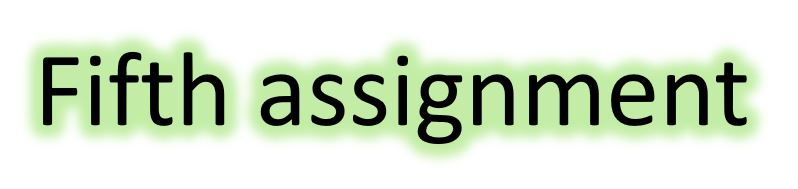

❓ Practice: 

Using the knowledge you gained from the lecture, you should be able to train a multilayer perceptron (MLP) in this exercise to identify images from the MNIST database that have handwritten digits.
The following steps will comprise the process:
1. Load and visualize the data
2. Define a neural network
3. Train the model
4. Evaluate the performance of our trained model on a test dataset 

$\color{red}{\text{Question}}$: 

Given that MNIST classification is an example of multiclass classification, in your opinion, what changes should happen in the network structure compared to binary classification?

**Bonus**

The model with the highest accuracy on the test receives an extra point.

**About Dataset:**

The MNIST dataset contains black and white, hand-written (numerical) digits that are 28x28 pixels large. This is a data set that is typically used for demonstrations of machine learning models, and as a first data set to test new types of models.

$\color{red}{\text{Cue}}$: 

You can use PyTorch and TensorFlow to get the dataset. With a brief search on the Internet, you can learn how to download, extract, and load the MNIST data.

#### Load and visualize the data

In [2]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# This transform converts the image data, which is initially stored as integers in the range [0, 255],
# into a PyTorch tensor. It also standardizes the data by subtracting the mean and dividing
# by the standard deviation. In this case, the mean is set to 0.5, and the standard deviation
# is also set to 0.5. It's common to use a mean and standard deviation (std) for image normalization
# in the range of (0.5, 0.5).
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Loading dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# The purpose of train_loader is to efficiently load and organize the training data in batches
# so that it can be fed into the training process of the model. It handles tasks such as shuffling
# the data, dividing it into batches, and moving data to the GPU. Each batch is a subset of the whole
# dataset that the model's parameters are updated with this subset during each iteration of the
# training process.
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, pin_memory=True, num_workers=4)

In [3]:
# Check whether the dataset is loaded
img, label = train_dataset[0]
print(img.shape, label)

torch.Size([1, 28, 28]) 5


Label : 1 - one


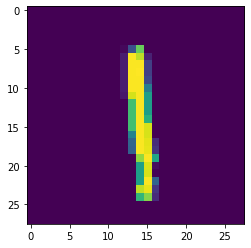

In [4]:
# Display and image including its label
def display_img(img, label):
    print(f"Label : {train_dataset.classes[label]}")
    plt.imshow(img.permute(1, 2, 0))

# Display the first image in the dataset
display_img(*train_dataset[8])

#### Define a neural network

In [5]:
# Define dimension of the images
height = img.shape[1]
width = img.shape[2]
input_size = height * width
fc1_output_size = 256
fc2_output_size = 128
fc3_output_size = 64
num_classes = 10 # There are 10 digits that we can recognize


# Define a class for my multi-layer perceptron
class MyMLP(torch.nn.Module):
    # Constructor of the class
    def __init__(self):
        # Call the constructor of the parent class nn.Module
        super(MyMLP, self).__init__()
        # Three fully-connected linear layer
        self.fc1 = torch.nn.Linear(input_size, fc1_output_size)
        self.dropout1 = torch.nn.Dropout(0.5)  # Add a dropout layer with a dropout rate of 0.5
        self.fc2 = torch.nn.Linear(fc1_output_size, fc2_output_size)
        self.dropout2 = torch.nn.Dropout(0.4)  # Add a dropout layer with a dropout rate of 0.5
        self.fc3 = torch.nn.Linear(fc2_output_size, fc3_output_size)
        self.dropout3 = torch.nn.Dropout(0.3)  # Add a dropout layer with a dropout rate of 0.5
        self.fc4 = torch.nn.Linear(fc3_output_size, num_classes)  # 10 output neurons for 10 classes
    
    def forward(self, x):
        x = x.view(-1, input_size)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        # Output layer with 10 neurons and softmax activation. Softmax is for classifying more than
        # two classes in data.
        x = self.fc3(x)
        return x

# Initialize the model
model = MyMLP()

# Move model to CUDA
model = model.cuda()

#### Train the model

In [6]:
# Create an instance of the CrossEntropyLoss class
criterion = torch.nn.CrossEntropyLoss()

# Adam (short for Adaptive Moment Estimation) is an optimization algorithm that is widely used
# in training deep neural networks. It is a combination of two other optimization algorithms: Adagrad
# and RMSprop. The key features of the Adam optimizer are its ability to adapt learning rates for
# each parameter individually and to keep track of both the first-order moments (the mean) and the
# second-order moments (the uncentered variance) of the gradients.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [7]:
# Define a train function for train phase
def train(model, train_loader, criterion, optimizer, num_epochs = 5):
    for epoch in range(num_epochs):
        # Set the model in training mode
        model.train()
        total_loss = 0.0
        for inputs, labels in train_loader:
            # Load data to the GPU
            inputs = inputs.cuda()
            labels = labels.cuda()
            # Clear the gradients of all model parametes
            optimizer.zero_grad()
            # A forward pass
            outputs = model(inputs)
            # Compute loss
            loss = criterion(outputs, labels)
            # A backward pass
            loss.backward()
            # Update the model's parameters using the optimizer method
            optimizer.step()
            # Sum of all losses
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader)}")

train(model, train_loader, criterion, optimizer, 20)

Epoch 1/20, Loss: 0.3950801007648203
Epoch 2/20, Loss: 0.17101879997341746
Epoch 3/20, Loss: 0.12007814706233677
Epoch 4/20, Loss: 0.09684514487162232
Epoch 5/20, Loss: 0.08099459992822951
Epoch 6/20, Loss: 0.07121853751968393
Epoch 7/20, Loss: 0.06395338892801178
Epoch 8/20, Loss: 0.05652438426305399
Epoch 9/20, Loss: 0.04872408085529988
Epoch 10/20, Loss: 0.04621511278816733
Epoch 11/20, Loss: 0.04131932783893484
Epoch 12/20, Loss: 0.0396777858817652
Epoch 13/20, Loss: 0.037524294010074344
Epoch 14/20, Loss: 0.03381824351907117
Epoch 15/20, Loss: 0.030751310374685602
Epoch 16/20, Loss: 0.02919950583439096
Epoch 17/20, Loss: 0.027503692631191238
Epoch 18/20, Loss: 0.02641428490526318
Epoch 19/20, Loss: 0.025763828458730906
Epoch 20/20, Loss: 0.02290700986217463


#### Evaluate the performance of the trained model on a test dataset

In [8]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    total_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            # Move inputs and labels to CUDA
            inputs = inputs.cuda()
            labels = labels.cuda()
            
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy}%")

test(model, test_loader)

Test Accuracy: 97.4%


# $\color{green}{\text{Grades}}$:

Question Number  | Scores
-------------------|------------------
Question 1    | 15
Question 2    | 20
Question 3 | 20
Question 4 | 15
Question 5 | 30